<a href="https://colab.research.google.com/github/ele9996/NetworkDynamicsAndLearningLabs/blob/main/HMW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import random

#Problem 1

##1.1

Plot the graph and variables definition

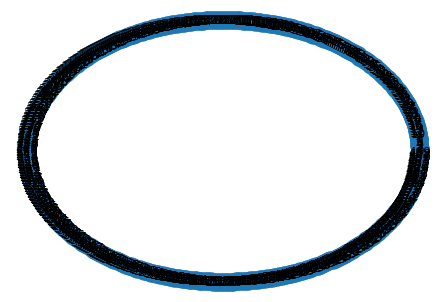

In [59]:

nodes=500
k=4


G = nx.Graph()
nx.add_cycle(G, range(nodes))
for n in range(nodes):
    other = n+3
    if other>=nodes:
        other-=nodes
    G.add_edge(other,n)

nx.draw_circular(G, with_labels=True)




 ![Dataset Description](https://raw.githubusercontent.com/ele9996/NetworkDynamicsAndLearningLabs/main/SIR.JPG)


In [60]:
#Array and variables definition

beta=0.3
p=0.7
weeks=15
N= 100


#array containing the total infected people each week for all simulations 
tot_inf = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

In [61]:
#simulation of epidemics

def MySim(weeks, nodes,n_status,n_infected): 

  n_status_next=n_status
  #print("initial_n_status_next=n_staus: {}".format(n_status_next))
  
  for i in range(weeks):
    #print("settimana {}".format(i))

    for node in range(nodes):
      #print("node:{}".format(node))
      m=0
      

      #find infected neighbors number(m)--> se non è già lui infetto
      for neigh in G.neighbors(node):
        if n_status[neigh]==1:
          m+=1
      #print("m={}".format(m))
      #with the following if chain I see if my node can change status
      random_prob=random.random()
      #print("random probability={}".format(random_prob))
      #print("known prob: {}".format((1-beta)**m))
      if random_prob > (1-beta)**m:
        n_status_next[node]=1  
      #print("status_next={}".format(n_status_next))
      #print("status={}".format(n_status))
      #if m>0 and yeah==True:
       # print(n_status)
      #catena if (ci sarà anche parte in cui si riprendono)

    

    infected=np.count_nonzero(n_status_next==1)
    #print("infected number in the week: {}".format(infected))
    n_infected[i]=infected
    n_status=n_status_next
  #print("fine")
  #print("final infected array for every week:{}".format(n_infected))
  return n_infected




In [62]:
#main loop

for n in range(N):
  #print("inizio simulazione {}".format(n))
  #n status contains the status of each node
  #status are defined as {0:'S', 1:'I', 2:'R'}
  n_status=np.zeros(nodes)
  
  #array containing the number of infected people each week in one simulation of 100
  n_infected=np.zeros(weeks)

  
  #I randomly search for 10 nodes which will start as infected
  random_index=random.sample(range(0,nodes-1),10)
  #print("the nodes I selected to be infected are: {}".format(random_index))

  for index in random_index:
    n_status[index]=1

  #I run the simulation
  n_infected=MySim(weeks,nodes,n_status,n_infected)
  #print(n_infected)
  tot_inf=np.concatenate((tot_inf, [n_infected]), axis = 0) 

#print("totale infettati per ogni settimana per simulazione:{}".format(tot_inf))

avg_inf=np.average(tot_inf,axis=0)

print("Average number of infected people per week={}".format(avg_inf))

Average number of infected people per week=[ 32.40594059  63.56435644  98.88118812 134.35643564 168.26732673
 198.53465347 226.36633663 252.40594059 275.20792079 296.55445545
 316.65346535 334.58415842 350.76237624 366.01980198 380.4950495 ]


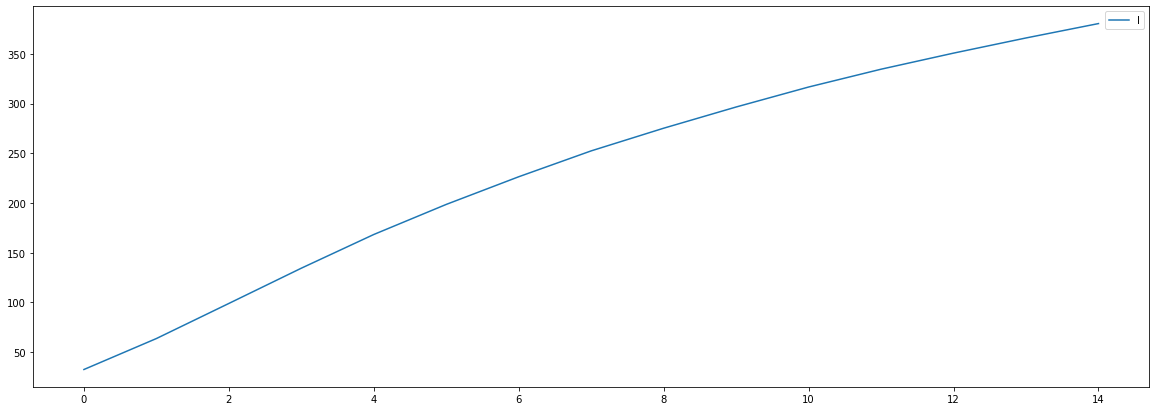

In [66]:
fig, ax = plt.subplots(figsize=(20,7))


ax.plot(avg_inf, label="I")

ax.legend()
plt.show()

